In [11]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt

sns.set(style = 'white')

# Load the dataset
file_path = '../data/raw_data/TelcoCustomerChurn.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [13]:
data.TotalCharges = pd.to_numeric(data.TotalCharges, errors='coerce')

In [5]:
data.dropna(inplace = True)

In [15]:
data['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

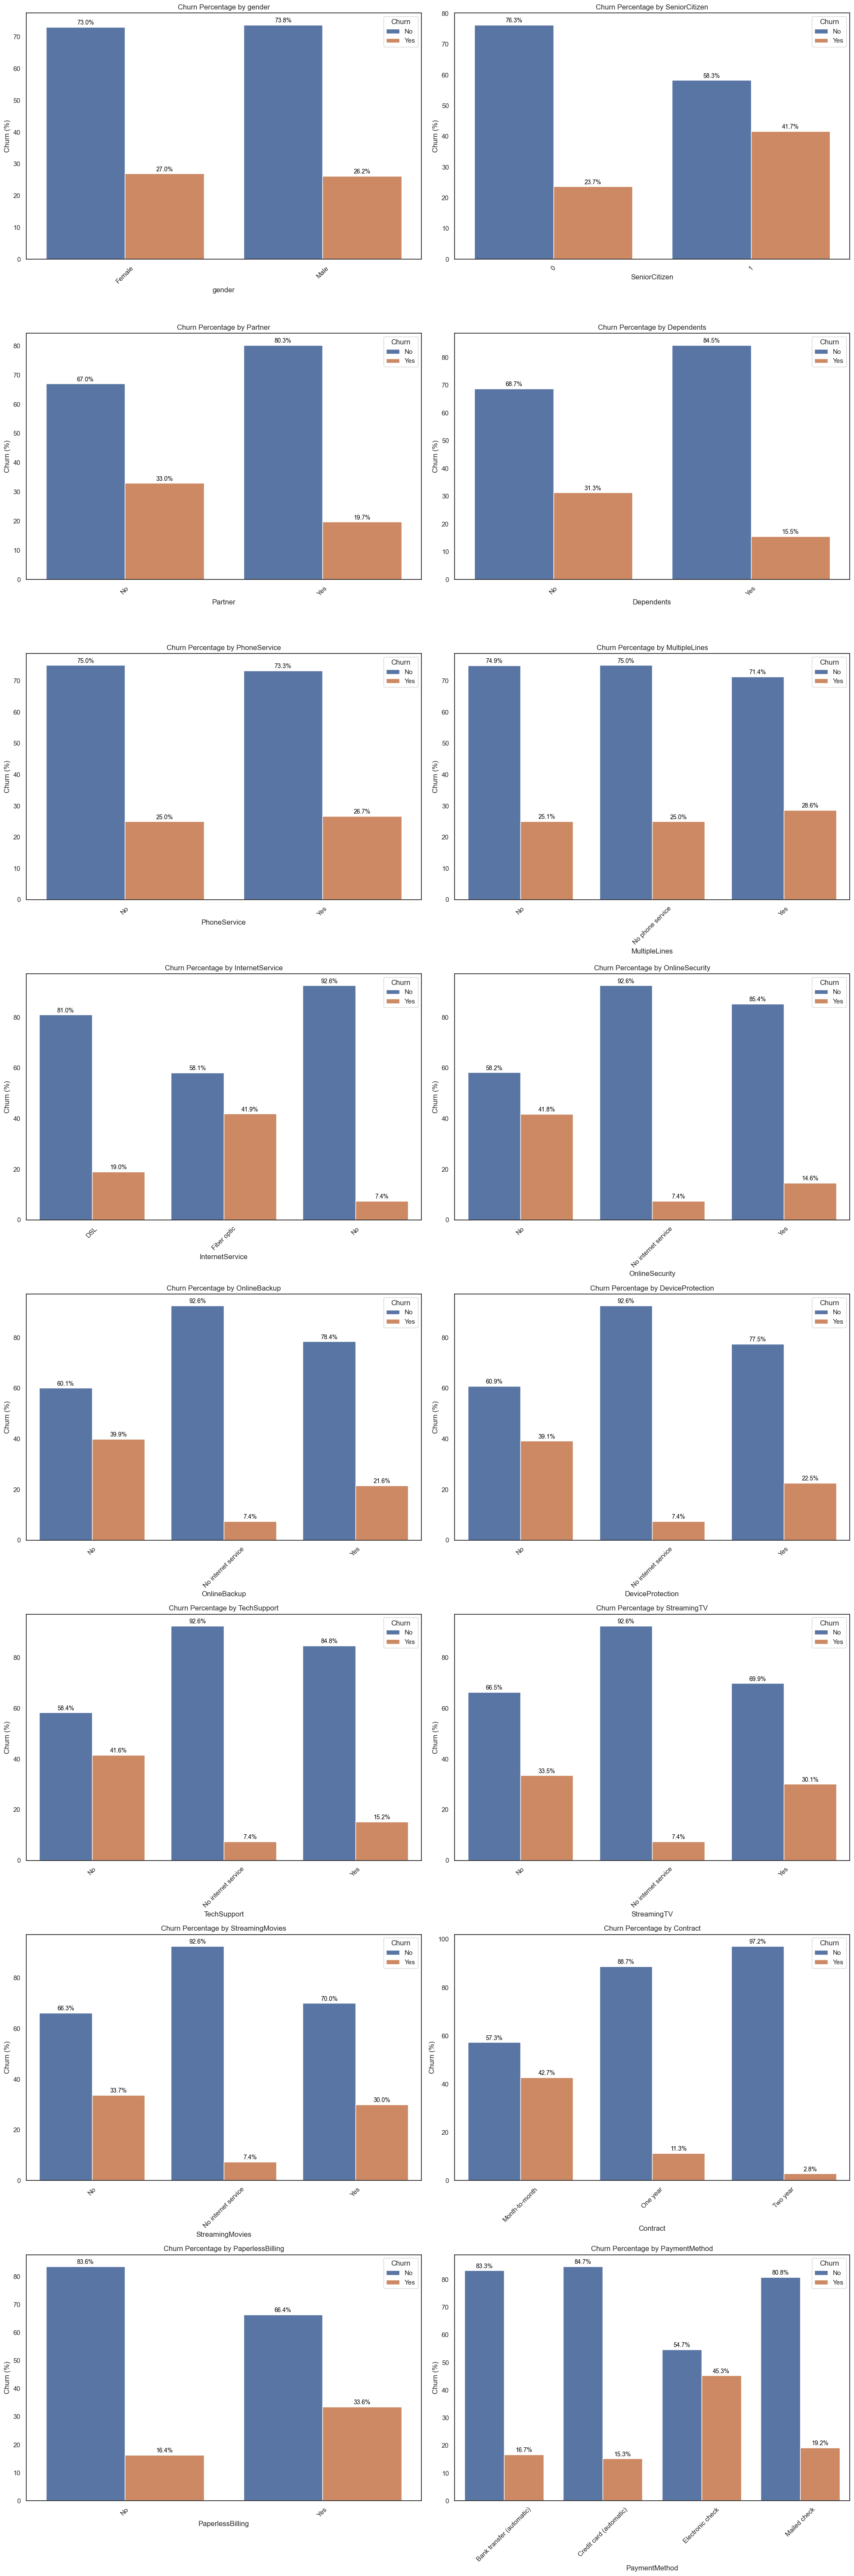

In [6]:
# Define the categorical features
categorical_features = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 
                        'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 
                        'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

# Create subplots
fig, ax = plt.subplots(8, 2, figsize=(20, 60))
ax = ax.ravel()

# Loop through each feature and plot the percentage of churn
for i, feature in enumerate(categorical_features):
    # Get the count of each category
    count = data.groupby([feature, 'Churn']).size().reset_index(name='count')
    total_count = data.groupby(feature).size().reset_index(name='total_count')
    
    # Merge the dataframes and calculate the percentage
    count = count.merge(total_count, on=feature)
    count['percentage'] = (count['count'] / count['total_count']) * 100
    
    # Create a bar plot
    sns.barplot(data=count, x=feature, y='percentage', hue='Churn', ax=ax[i])
    
    # Annotate the bars with the percentage, excluding those that are 0.0%
    for p in ax[i].patches:
        if p.get_height() != 0:
            ax[i].annotate(f"{p.get_height():.1f}%", 
                           (p.get_x() + p.get_width() / 2., p.get_height()), 
                           ha='center', va='center', fontsize=10, color='black', xytext=(0, 7), 
                           textcoords='offset points')
    
    # Set the title and rotate x-axis labels for better readability
    ax[i].set_title(f'Churn Percentage by {feature}')
    ax[i].tick_params(axis='x', rotation=45)
    ax[i].set_ylabel('Churn (%)')
    
fig.tight_layout()
plt.show()


In [44]:
# Define the numerical features
numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Descriptive statistics stratified by Churn status
descriptive_stats = data.groupby('Churn')[numerical_features].describe().transpose()

descriptive_stats

Churn                          No          Yes
tenure         count  5163.000000  1869.000000
               mean     37.650010    17.979133
               std      24.076940    19.531123
               min       1.000000     1.000000
               25%      15.000000     2.000000
               50%      38.000000    10.000000
               75%      61.000000    29.000000
               max      72.000000    72.000000
MonthlyCharges count  5163.000000  1869.000000
               mean     61.307408    74.441332
               std      31.094557    24.666053
               min      18.250000    18.850000
               25%      25.100000    56.150000
               50%      64.450000    79.650000
               75%      88.475000    94.200000
               max     118.750000   118.350000
TotalCharges   count  5163.000000  1869.000000
               mean   2555.344141  1531.796094
               std    2329.456984  1890.822994
               min      18.800000    18.850000
               25%     577.825000   134.500000
               50%    1683.600000   703.550000
               75%    4264.125000  2331.300000
               max    8672.450000  8684.800000

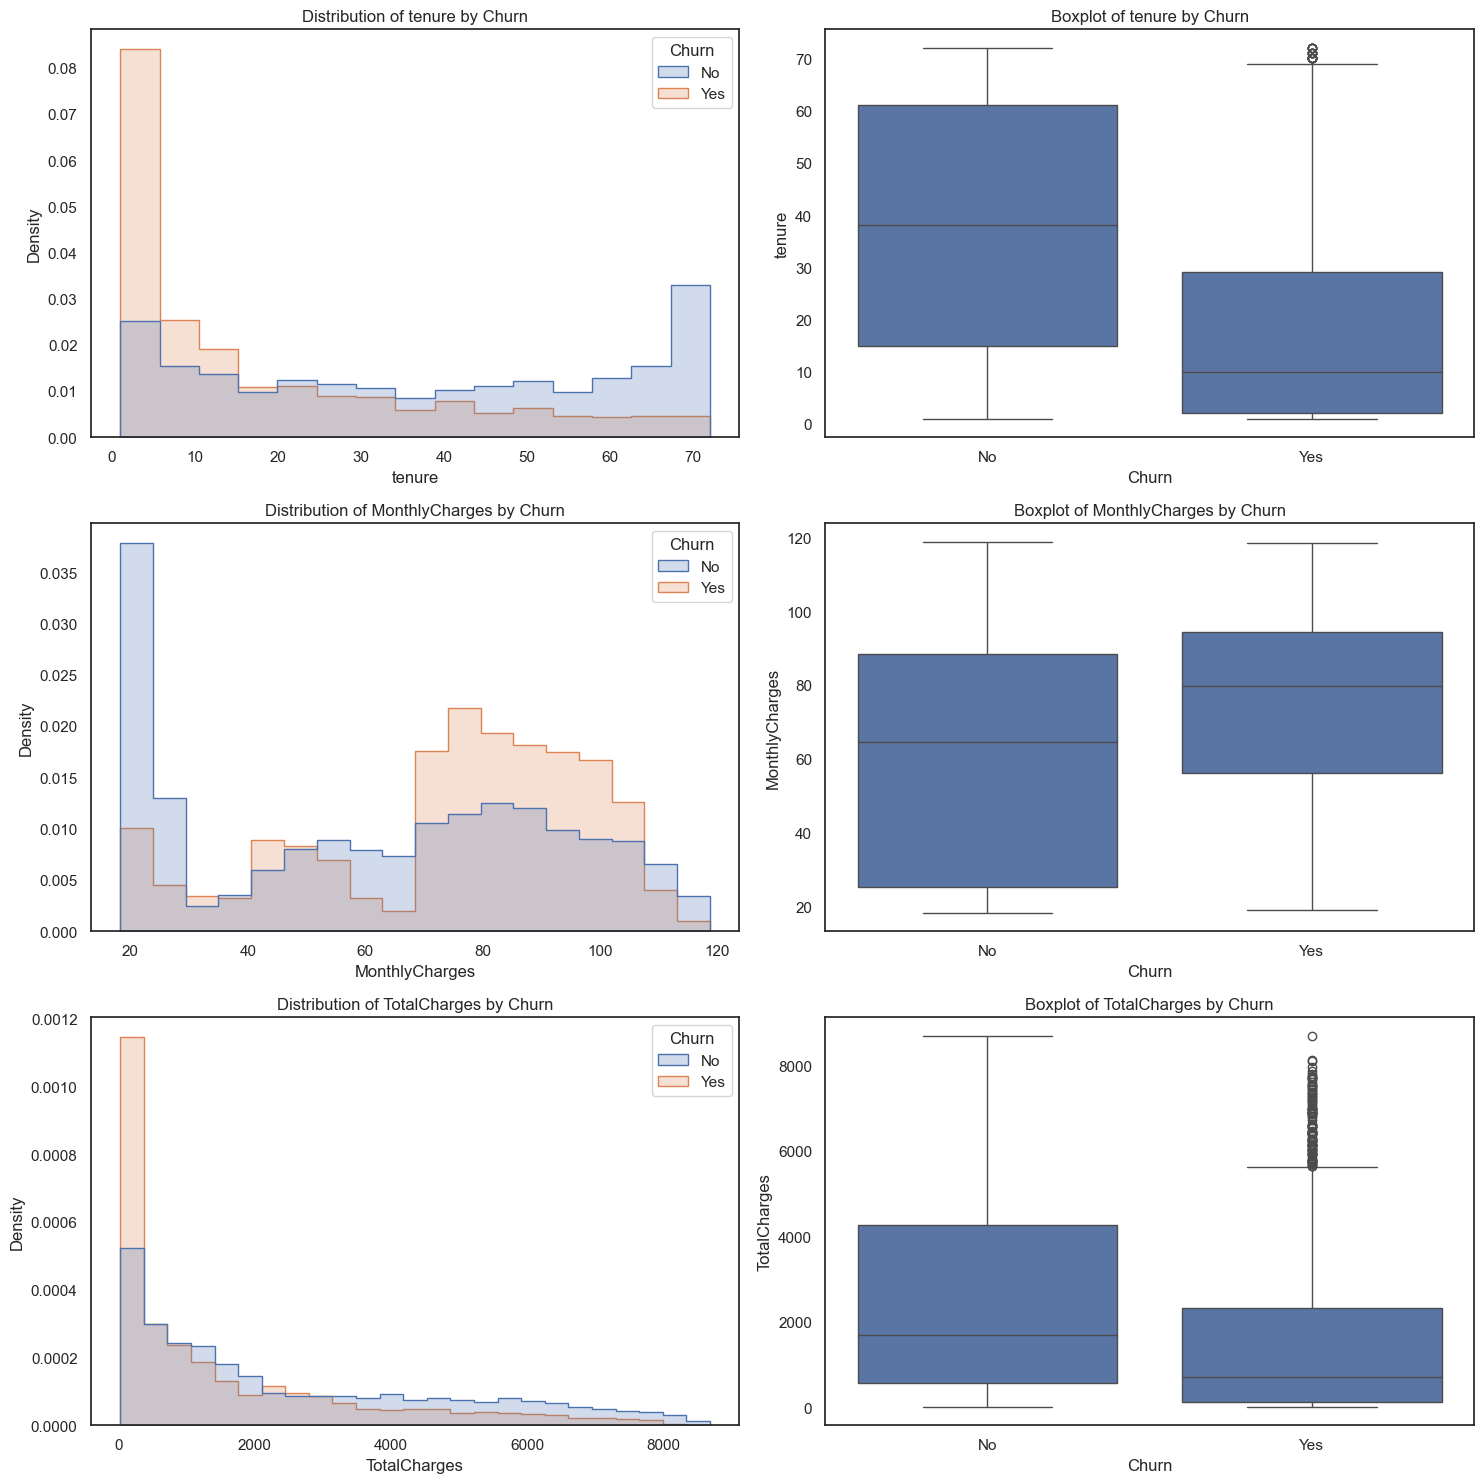

In [45]:
# Create subplots
fig, ax = plt.subplots(3, 2, figsize=(15, 15))
ax = ax.ravel()

# Loop through each numerical feature and plot the distribution and boxplot
for i, feature in enumerate(numerical_features):
    # Distribution Plot
    sns.histplot(data=data, x=feature, hue='Churn', element='step', stat='density', common_norm=False, ax=ax[i*2])
    ax[i*2].set_title(f'Distribution of {feature} by Churn')
    ax[i*2].set_ylabel('Density')
    
    # Box Plot
    sns.boxplot(data=data, x='Churn', y=feature, ax=ax[i*2+1])
    ax[i*2+1].set_title(f'Boxplot of {feature} by Churn')
    
fig.tight_layout()
plt.show()